# Jupyter notebooks features overview

IPython allows to create a formatted document containing text, equations, and code. There is a WYSIWYG interface: JupyterLab.

The document is split into cells. Cells can be of three types:

* Code
* Markdown (simple wiki markup language)
* Raw

This current cell is a markdown cell.

It is possible to use **bold**, *itallic*, and `verbatim`.

    This is some verbatim code.
    $ echo "helloworld"

In addition, it is possible, through Python, to add all sorts of contents (html, video, audio, ...) to the page. This notebook aims at demonstrating these possibilities through a number of practical examples.

## Numerical cells and plots

Jupyter let's you import easily all the numpy and matplotlib libraries and use them 'Matlab' style.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

%matplotlib`inline` option let's you plot things in the notebook directly.

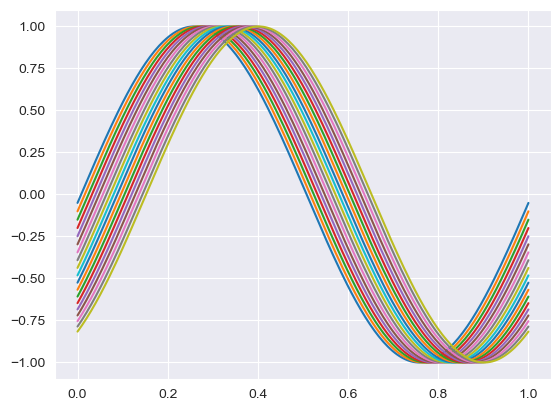

In [2]:
t = np.linspace(0,1,200)
for i in range(1,20):
    plt.plot(t, np.sin(2*np.pi*t-t[10*i]))

In [3]:
np.pi*2

6.283185307179586

It is possible to give this plot **XKCD** style!

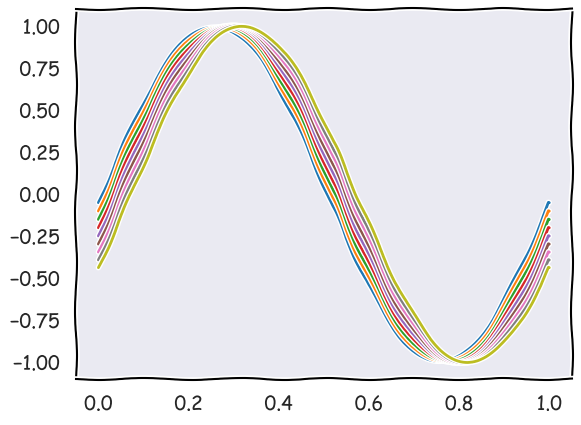

In [4]:
# Running this in a 'with' allows the style to be temporary
with plt.xkcd():
    for i in range(1,10):
        plt.plot(t, np.sin(2*np.pi*t-t[10*i]))

## Built-in help

In case you need to be reminded of some syntax, several ways are possible. The first is auto-completion.

In [5]:
# t = np.lins

It is also possible to display the docstring of a function.

In [6]:
np.linspace?

The following let's you get even more information and look a the source code.

In [7]:
np.linspace??

## Magic

Many [IPython magics](http://ipython.readthedocs.org/en/stable/interactive/magics.html) can also be used in JupyterLab. They can be listed using the `%lsmagic` magic.

In [8]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

One can for example use the `%timeit` magic to compare the runtime of two pieces of code. For example, let's compare a pure Python recursive implementation of the factorial to an implementation using numpy vector routines.

In [9]:
# recursive implementation
def factorial_1(n):
    if n > 1:
        return n*factorial_1(n-1)
    else:
        return 1
    
# numpy implementation
def factorial_2(n):
    return np.prod(np.arange(1,n+1))

In [10]:
%timeit factorial_1(100)

25.8 µs ± 14.7 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [11]:
%timeit factorial_2(100)

6.35 µs ± 2.18 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## Equations

IPython notebooks allow to display equations just by typing in latex. For example, we can write the famous Fourier transform equation as
$$
\int_{-\infty}^\infty f(t) e^{-i\omega t} dt.
$$

It is also possible to add some math in text, for example  a linear system $Ax = b$.

## Images

It is possible to include images in the notebooks, either by adding the HTML tags directly in a markdown cell such as the following:

<img src="https://www.epfl.ch/campus/services/communication/wp-content/uploads/2019/03/EPFL-Corp-ID-New-Visual-Identity-Logo.png" width=400>

or by using an IPython widget.

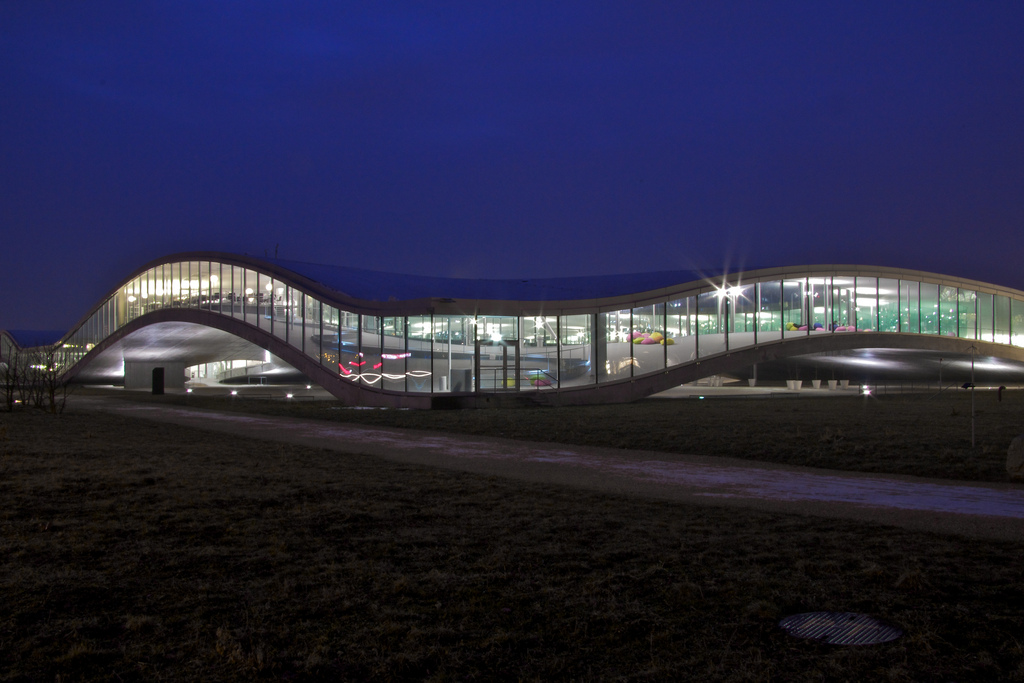

In [12]:
from IPython.display import Image
# Photos credit: https://commons.wikimedia.org/wiki/File:Rolex_Learning_center.jpg
Image('./Data/rlc.jpg', width=800,height=600)

## Videos

Videos can be embedded in the notebook. For example, here is a YouTube video.

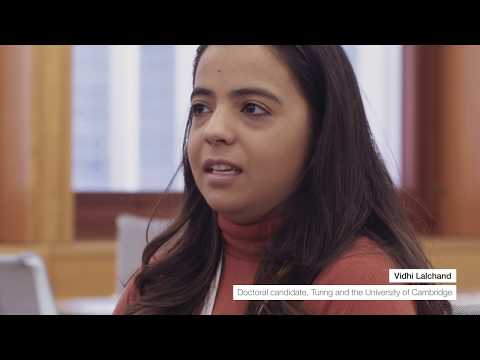

In [13]:
from IPython.display import YouTubeVideo
from datetime import timedelta

# It is possible to start the video at a specific time
start=int(timedelta(hours=0, minutes=0, seconds=0).total_seconds())

YouTubeVideo("OJy2h9mgiX8", start=start, autoplay=0, theme="light", color="red")

And here is a Vimeo video.

In [14]:
from IPython.display import VimeoVideo

VimeoVideo("12891305")

Even entire websites can be embedded.

In [15]:
from IPython.display import IFrame

IFrame('https://dlab.epfl.ch/teaching/fall2019/cs401/', width=800, height=600)

## Audio data

JupyterLab also makes it possible to listen to audio data in the browser directly.

In [16]:
from scipy.io import loadmat, wavfile
from IPython.lib.display import Audio

# import the speech from a wav file
r,speech = wavfile.read('Data/german_speech_44100.wav')
_,rir = wavfile.read('Data/RIRs.wav')

# Add the audio widget
print('Speech')
display(Audio(data=speech, rate=r))
print('Room Impulse Response')
display(Audio(data=rir[:,0], rate=r))

Speech


Room Impulse Response


## Interactive Widgets

IPython also allows to create interactive widgets to easily visualize graphs with varying parameters. Unfortunately, the widgets are not preserved when you export to html, but you can embed them in html (see Widgets > Embed). 

In [17]:
from ipywidgets import interact

# We need to define a function that takes as arguments the parameters
# we would like to play with.
def plot_norm(mean=0,sd=5):
    plt.hist(np.random.normal(mean,sd,100000),bins=100)
    plt.xlim((-15,15))
    plt.title("Normal")

# Now we only need to call the interact function
# keyword arguments are used to give the parameter ranges
interact(plot_norm, mean=(-5,5,10), sd=(0,30,5))

interactive(children=(IntSlider(value=0, description='mean', max=5, min=-5, step=10), IntSlider(value=5, descr…

<function __main__.plot_norm(mean=0, sd=5)>

## Interactive plots with Bokeh

Until now, all the plots we have shown were not interactive, that is, it was not possible to zoom into some part of the graph or moves things around. [Bokeh](http://bokeh.pydata.org) is a Python module that allows just to do that. In style!

In [18]:
from bokeh.plotting import figure, show, output_notebook
output_notebook()

Loading BokehJS ...

In [19]:
N = 500

x = np.linspace(-10, 10, N)
y = np.linspace(-10, 10, N)
xx, yy = np.meshgrid(x, y)
# d = np.sin(xx)*np.cos(yy)
d = (xx**2 + yy**2)**0.7 - 4.*np.sin(2*xx) - 1.8*np.cos(2*yy)

p = figure(x_range=[-10, 10], y_range=[-10, 10])
p.image(image=[d], x=[-10], y=[-10], dw=[20], dh=[20], palette="Spectral11")

show(p)

## Magnificient plots with Seaborn

[Seaborn](http://stanford.edu/~mwaskom/software/seaborn/index.html) is a Python package that wraps around matplotlib and makes the plots look extremely nice. It adds nice default colormaps and has integrated options for fancy plots.

It is not installed by default with Anaconda, so to obtain it type the following in a terminal:

    conda install seaborn
        
To demonstrate it, we have collected tweets containing the following keywords:

* reproducible research
* ipython notebook
* open access
* open science
* open data
* bigdata
* epfl

This example was mostly taken from this [tutorial](http://adilmoujahid.com/posts/2014/07/twitter-analytics/).

To activate seaborn, simply import it. It is possible to set a default palette.

In [20]:
import seaborn as sns

# set the default color palette
# try other options: 'Blues', sns.cubehelix_palette(8)
sns.set_palette('Blues')

# Seaborn can also use a context for different purpose
# possible values are paper, notebook, talk, and poster
sns.set_context("notebook")

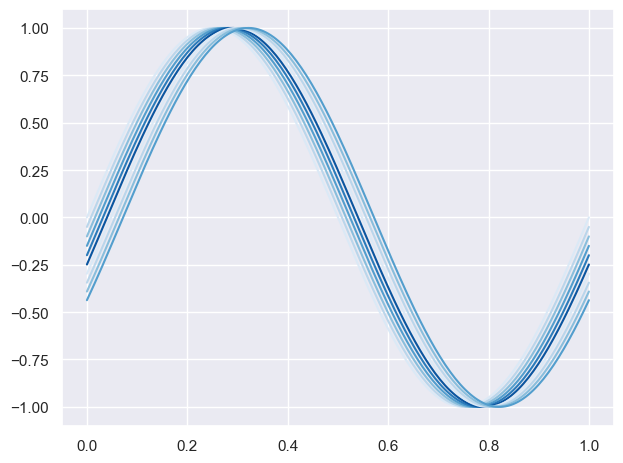

In [21]:
# try to plot our boring old sine curves
for i in range(0,10):
    plt.plot(t, np.sin(2*np.pi*t-t[10*i]))
plt.tight_layout()

Now we will import the tweets in a [pandas](http://pandas.pydata.org) to do some statistics.

In [22]:
import json
import pandas as pd

In [23]:
tweets_data_path = './Data/twitter_data.txt'

tweets_data = []
with open(tweets_data_path, "r") as tweets_file:
    for line in tweets_file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue

In [24]:
tweets_data[0]['text']

'RT @KirkDBorne: Fraud Detection w/ #DeepLearning by @h2oai at Paypal: https://t.co/dh6WhlX75U #BigData #MachineLearning #DataScience https:…'

Let's build a data frame to better handle our data.

In [27]:
tweets = pd.DataFrame()

fields = ['text','lang']
for f in fields:
    tweets[f] = list(map(lambda tweet: tweet[f], tweets_data))

tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data))
tweets['username'] = list(map(lambda tweet: tweet['user']['screen_name'], tweets_data))
tweets['followers_count'] = list(map(lambda tweet: tweet['user']['followers_count'], tweets_data))
tweets['time_zone'] = list(map(lambda tweet: tweet['user']['time_zone'], tweets_data))

tweets['text_len'] = list(map(lambda tweet: len(tweet), tweets['text']))

print('We got',len(tweets_data),'tweets.')

We got 10698 tweets.


In [28]:
tweets.head()

,text,lang,country,username,followers_count,time_zone,text_len
0,RT @KirkDBorne: Fraud Detection w/ #DeepLearni...,en,None,mejorame,170,Madrid,140
1,IBM Works With The Weather Company To Track Ea...,en,None,siprasad,716,New Delhi,113
2,"Full issue ""Mass Atrocity Prevention"" (Part I)...",en,None,CogitatioPaG,48,Pacific Time (US & Canada),104
3,rsocrata - Provides easier interaction with So...,en,None,oss_rlang,0,Atlantic Time (Canada),136
4,RT @JMiguelLorente: In #HackWeTrust — Sunlight...,en,None,OGoov_EU,26,Pacific Time (US & Canada),127


On list comprehensions and anonymous functions

In [30]:
# list comprehensions
my_list = [10*x+1 for x in range(10)]
print(my_list)
# map and anonymous functions
my_list = list(map(lambda x:x+1, my_list))
print(my_list)

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91]
[2, 12, 22, 32, 42, 52, 62, 72, 82, 92]


Now we want to analyze words appearing in the tweets. We will apply a regular expression to detect keywords in the text of the tweets. Then we plot a histogram of the data to see which keywords are popular.

In [31]:
import re

In [32]:
re.sub('s+','s*', '|'.join(['open science','epfl']))

'open s*cience|epfl'

In [33]:
# a helper function to apply the regexp
def word_in_text(words, text):
    words = re.sub('s+','s*', '|'.join(words))
    text = text.lower()
    match = re.search(words, text)
    if match:
        return True
    return False

In [35]:
print(word_in_text(['open science','epfl'],'open science at epfl is great'))
print(word_in_text(['open science','epfl'],'open science is great'))
print(word_in_text(['open science','epfl'],'science is great'))

True
True
False


In [36]:
# actually apply the regexp
keywords = ['open access', 'open science', 'ipython', 'open data', 'reproducible research','epfl']
for w in keywords:
    tweets[w] = tweets['text'].apply(lambda tweet: word_in_text([w], tweet))
    
tweets_by_kw = pd.Series([tweets[w].value_counts()[True] for w in keywords], index=keywords)

In [37]:
tweets_by_kw

open access              289
open science              56
ipython                   11
open data                436
reproducible research     11
epfl                      41
dtype: int64

Seaborn has specialized routine to plot dataframes from pandas. We make use of that to plot the histogram.

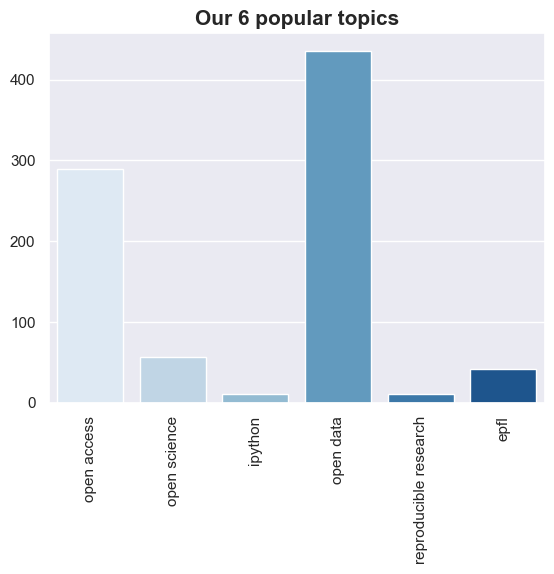

In [38]:
def nice_bar_plot(xlbl, data, n):
    
    fig, ax = plt.subplots()
    ax.set_title('Our ' + str(n) + ' ' + xlbl, fontsize=15, fontweight='bold')
    sns.barplot(x=data[:n].keys(), y=data[:n], ax=ax)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    
nice_bar_plot('popular topics', tweets_by_kw, 6)

We would like to get some idea of the distribution of the length of the tweets in each of these category. Let us categorize each tweet and then display some boxplot. Again, seaborn allows to do that fairly easily.

In [39]:
# Here we want to tag each tweet with a category
tweets['category'] = np.nan
for kw in keywords:
    tweets.loc[tweets[kw] == True,'category'] = kw

In [40]:
tweets['category'][:10]

0            NaN
1            NaN
2    open access
3      open data
4            NaN
5            NaN
6            NaN
7      open data
8            NaN
9            NaN
Name: category, dtype: object

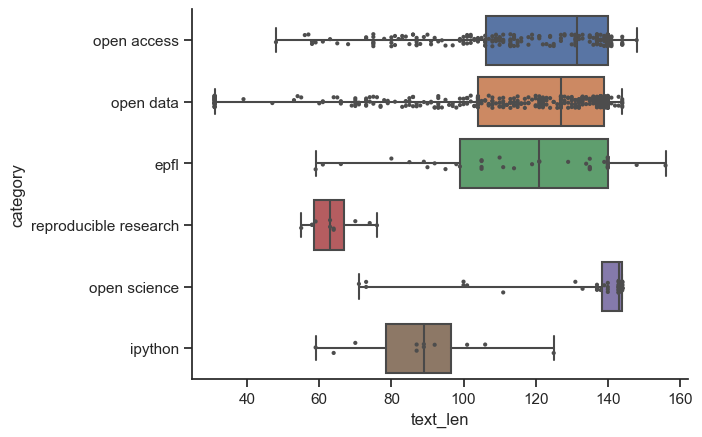

In [41]:
sns.set(style="ticks", color_codes=True)

# Plot the text length with horizontal boxes
ax = sns.boxplot(x="text_len", y="category", data=tweets,
                 whis=np.inf)

# Add in points to show each tweet
sns.stripplot(x="text_len", y="category", data=tweets,
              jitter=True, size=3, color=".3", linewidth=0)

# This removes top and right axis
sns.despine(trim=False)

## Conclusion

IPython offers great tools both for computional experiments and to share these experiments in a visually enticing way.

The notebook format can be shared as is to allow someone else to play with the data, or it can be converted to a format that allow for displaying such as HTML, LaTeX, PDF, etc. To do so, use the `ipython nbconvert` utility in the terminal.

## Exercises

* Consider the first plot we saw (below). Add a title, labels to the axes, add another function plot with a different color and add a legend for both. See [this gallery of examples for inspiration](https://matplotlib.org/gallery.html). 

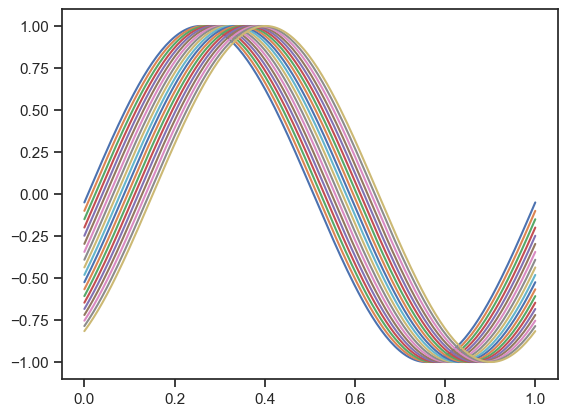

In [42]:
t = np.linspace(0,1,200)
for i in range(1,20):
    plt.plot(t, np.sin(2*np.pi*t-t[10*i]))

* Recover the normal distribution interactive widget we saw before. Add an extra feature allowing the user to skew the distribution making it fatter on a side (e.g. the right side). Take a look at [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewnorm.html), it might help.

In [43]:
from ipywidgets import interact

# Start by fattening the function distribution here
def plot_norm(mean=0,sd=5):
    plt.hist(np.random.normal(mean,sd,100000),bins=100)
    plt.xlim((-15,15))
    plt.title("Normal")

# Add a new parameter to control the fatness of the distribution side
interact(plot_norm, mean=(-5,5,10), sd=(0,30,5))

interactive(children=(IntSlider(value=0, description='mean', max=5, min=-5, step=10), IntSlider(value=5, descr…

<function __main__.plot_norm(mean=0, sd=5)>